# ACT and SAT Participation in the US

Fast Facts about the ACT and SAT:
    
    Scale          1-36                                   200-800
   
     
   National          
      |    2017     21 -  56%       |                      1060 - 48%        |
      |    2021     20.3 - 35%       |                     1060  - 41%        |   
 
 CA              
   |      2017      22 - 31%     |                       1055 - 53%  |
  |       2021      26.8 - 5%   |                        1057 - 24%    |
                      
Source: National Center for Education Statistics

In [86]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import warnings

In [58]:
# Reading, cleaning and merging data
act_2017 = pd.read_csv('../data/act_2017.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')

act_2017['Participation'] = pd.to_numeric(act_2017['Participation'].str.strip('%'),errors='coerce')/100
sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.strip('%'),errors='coerce')/100

states = act_2017.merge(sat_2017,on='State',suffixes=['_act','_sat'])

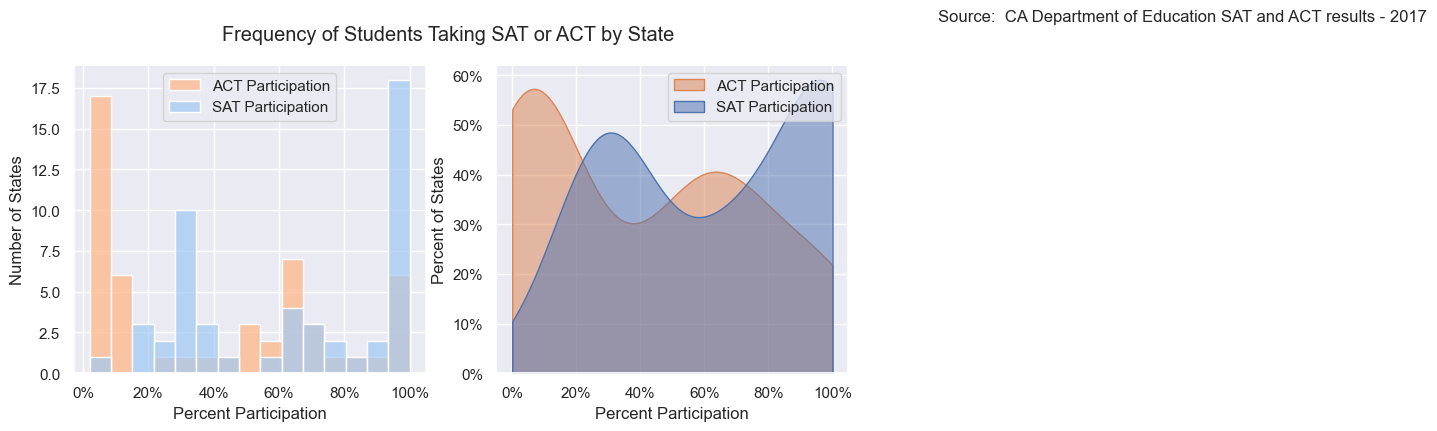

In [173]:
sns.set()


fig, axs = plt.subplots(ncols = 2, figsize=(10,4))

fig.suptitle('Frequency of Students Taking SAT or ACT by State')

sns.histplot(data = states[['Participation_act','Participation_sat']],
             ax = axs[0],
             bins=15,
             palette = 'pastel',
             alpha=0.7)
axs[0].set_xlabel('Percent Participation')
axs[0].set_ylabel('Number of States')
axs[0].set_xticks(ticks = [0,0.2,0.4,0.6,0.8,1],labels = ['0%','20%','40%','60%','80%','100%'])
axs[0].legend(['ACT Participation','SAT Participation'])

sns.kdeplot(data = states[['Participation_act','Participation_sat']],
            ax = axs[1],
            shade=True,
            clip=(0,1),
            alpha=0.5)

axs[1].set_xlabel('Percent Participation')
axs[1].set_ylabel('Percent of States')
axs[1].set_xticks(ticks = [0,0.2,0.4,0.6,0.8,1],labels = ['0%','20%','40%','60%','80%','100%'])
axs[1].set_yticks(ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6],labels = ['0%','10%','20%','30%','40%','50%','60%'])
axs[1].legend(['ACT Participation','SAT Participation'])
plt.figtext(0.99,0.99,"Source:  CA Department of Education SAT and ACT results - 2017");


In [213]:
# Difference between ACT and SAT participation by state 

states['act_bias'] = states['Participation_act'] - states['Participation_sat']



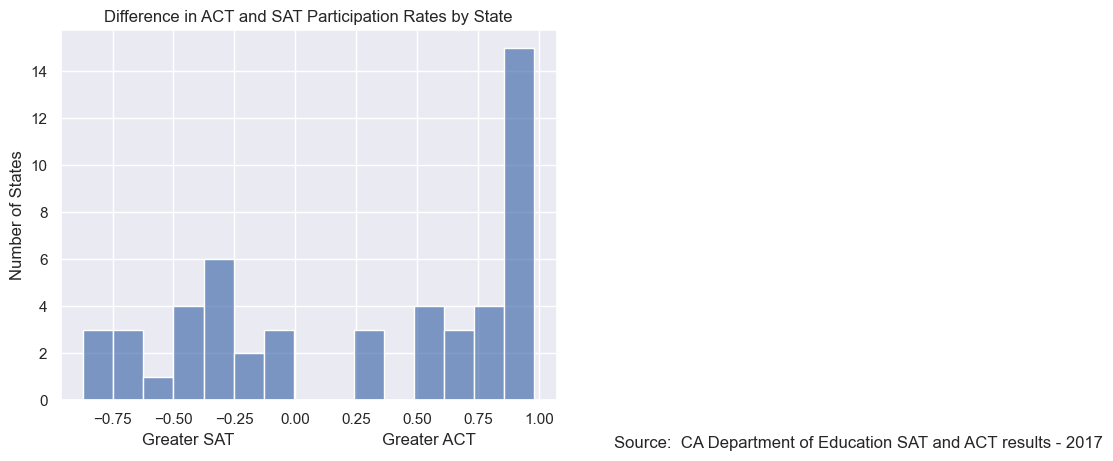

In [217]:
sns.histplot(data = states['act_bias'],
             bins=15,
             palette = 'pastel',
             alpha=0.7)
plt.title('Difference in ACT and SAT Participation Rates by State')
plt.xlabel('Greater SAT                                Greater ACT')
plt.ylabel('Number of States')
plt.figtext(0.99,0.01,"Source:  CA Department of Education SAT and ACT results - 2017");


## Why Should I Take the ACT?

It's easier to get into college with lower ACT scores!

In [5]:
# Read SAT/ACT College Data

colleges = pd.read_csv('../data/sat_act_by_college.csv')

In [6]:
colleges.head()


,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [7]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


In [8]:
# Splitting and Converting 25th/75th Percentile Data

colleges[['SAT_25','SAT_75']] = colleges.iloc[:,6].str.split('-',expand=True).dropna(axis=1)
colleges[['ACT_25','ACT_75']] = colleges.iloc[:,7].str.split('-',expand=True).dropna(axis=1)

for i in ['SAT_25','SAT_75','ACT_25','ACT_75']:
    colleges[i] = pd.to_numeric(colleges[i],errors='coerce')

In [9]:
# Import data on SAT and ACT percentiles
# Data retrieved from blog.prepscholar.com

percentiles = pd.read_csv('../data/percentiles.csv')

In [10]:
# Merge colleges and percentiles to show percentile 

colleges = pd.merge(colleges,percentiles,how='left',left_on='SAT_25',right_on='sat_score')
colleges.drop(columns=['act_score','act_percent','sat_score','SAT_25'],axis=1,inplace=True)
colleges.rename({'sat_percent':'sat_percent_25'},axis=1,inplace=True)

colleges = pd.merge(colleges,percentiles,how='left',left_on='SAT_75',right_on='sat_score')
colleges.drop(columns=['act_score','act_percent','sat_score','SAT_75'],axis=1,inplace=True)
colleges.rename({'sat_percent':'sat_percent_75'},axis=1,inplace=True)

colleges = pd.merge(colleges,percentiles,how='left',left_on='ACT_25',right_on='act_score')
colleges.drop(columns=['act_score','sat_percent','sat_score','ACT_25'],axis=1,inplace=True)
colleges.rename({'act_percent':'act_percent_25'},axis=1,inplace=True)

colleges = pd.merge(colleges,percentiles,how='left',left_on='ACT_75',right_on='act_score')
colleges.drop(columns=['act_score','sat_percent','sat_score','ACT_75'],axis=1,inplace=True)
colleges.rename({'act_percent':'act_percent_75'},axis=1,inplace=True)



C:\Users\Ari\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [11]:
# Create columns to show ACT bias at 25th and 75th percentile

colleges['ACT_bias_25'] = colleges['act_percent_25'] - colleges['sat_percent_25']
colleges['ACT_bias_75'] = colleges['act_percent_75'] - colleges['sat_percent_75']

In [12]:
colleges[['ACT_bias_25','ACT_bias_75']].describe()

,ACT_bias_25,ACT_bias_75
count,380.000000,383.000000
mean,5.421053,0.835509
std,5.640653,3.118362
min,-13.000000,-16.000000
25%,2.000000,-1.000000
50%,5.000000,0.000000
75%,9.000000,2.000000
max,29.000000,19.000000


<AxesSubplot:>

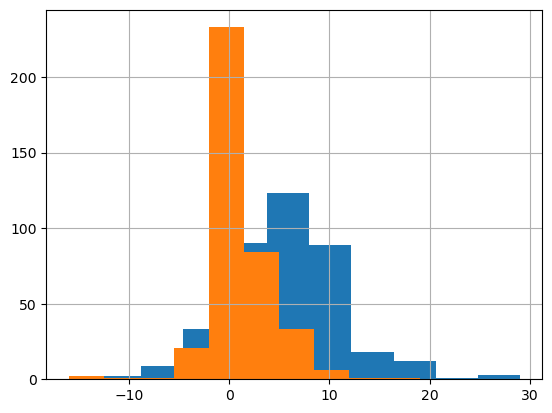

In [13]:
colleges['ACT_bias_25'].hist(bins=10)
colleges['ACT_bias_75'].hist(bins=10)

In [52]:
ca_colleges = colleges[colleges['School'].astype('str').str.contains('California')]

<AxesSubplot:>

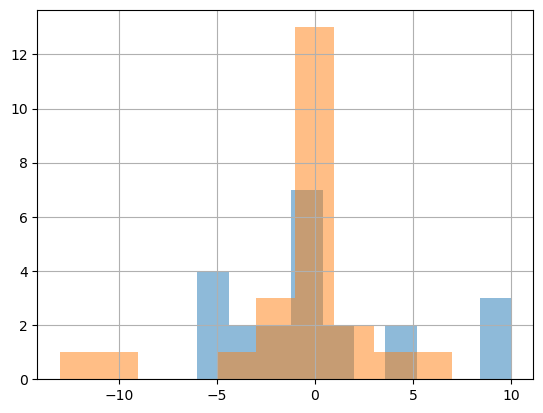

In [55]:
ca_colleges['ACT_bias_25'].hist(bins=10,alpha=0.5)
ca_colleges['ACT_bias_75'].hist(bins=10,alpha=0.5)


# CA Performance on Both Tests

In [14]:
# Reading the data

ca_sat = pd.read_csv('../data/SAT_2019_ca.csv')
ca_act = pd.read_csv('../data/act_2019_ca.csv')

In [15]:
# Viewing the data

ca_sat.info()
ca_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [16]:
# Selecting and merging columns

ca_sat = ca_sat[['SCode','Enroll12','NumTSTTakr12','TotNumBothBenchmark12','PctBothBenchmark12']]
ca_act = ca_act[['SCode','Enroll12','NumTstTakr','NumGE21','PctGE21']]
ca = pd.merge(ca_sat,ca_act,how='left',on='SCode',suffixes=['sat','act'])

In [17]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37786 entries, 0 to 37785
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  37263 non-null  float64
 1   Enroll12sat            37263 non-null  float64
 2   NumTSTTakr12           37263 non-null  float64
 3   TotNumBothBenchmark12  34726 non-null  object 
 4   PctBothBenchmark12     34726 non-null  object 
 5   Enroll12act            37523 non-null  float64
 6   NumTstTakr             37523 non-null  float64
 7   NumGE21                36570 non-null  object 
 8   PctGE21                36570 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.9+ MB


In [18]:
ca.dropna(subset=['SCode'],axis=0)

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
0,630046.0,18.0,0.0,NaN,NaN,18.0,0.0,NaN,NaN
1,634758.0,29.0,10.0,*,*,29.0,0.0,NaN,NaN
2,1930924.0,206.0,102.0,14,13.73,206.0,31.0,4,12.90
3,1931476.0,227.0,113.0,18,15.93,227.0,32.0,9,28.13
4,1931856.0,18.0,14.0,*,*,18.0,1.0,*,*
...,...,...,...,...,...,...,...,...,...
37258,0.0,4447.0,2256.0,1248,55.32,4447.0,1078.0,565,52.41
37259,0.0,4447.0,2256.0,1248,55.32,4559.0,594.0,180,30.30
37260,0.0,4447.0,2256.0,1248,55.32,1869.0,76.0,57,75.00
37261,0.0,4447.0,2256.0,1248,55.32,114618.0,20678.0,9182,44.40


In [19]:
ca = ca[ca['SCode'] != 0]

In [20]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 37785
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  1981 non-null   float64
 1   Enroll12sat            1981 non-null   float64
 2   NumTSTTakr12           1981 non-null   float64
 3   TotNumBothBenchmark12  1745 non-null   object 
 4   PctBothBenchmark12     1745 non-null   object 
 5   Enroll12act            2241 non-null   float64
 6   NumTstTakr             2241 non-null   float64
 7   NumGE21                1886 non-null   object 
 8   PctGE21                1886 non-null   object 
dtypes: float64(5), object(4)
memory usage: 195.6+ KB


In [21]:
ca.dropna(how='any',axis=0,inplace=True)
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 2 to 1980
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  1408 non-null   float64
 1   Enroll12sat            1408 non-null   float64
 2   NumTSTTakr12           1408 non-null   float64
 3   TotNumBothBenchmark12  1408 non-null   object 
 4   PctBothBenchmark12     1408 non-null   object 
 5   Enroll12act            1408 non-null   float64
 6   NumTstTakr             1408 non-null   float64
 7   NumGE21                1408 non-null   object 
 8   PctGE21                1408 non-null   object 
dtypes: float64(5), object(4)
memory usage: 110.0+ KB


In [22]:
# Converting columns to numeric

ca['TotNumBothBenchmark12'] = pd.to_numeric(ca['TotNumBothBenchmark12'],errors='coerce')
ca['PctBothBenchmark12'] = pd.to_numeric(ca['PctBothBenchmark12'],errors='coerce')
ca['NumGE21'] = pd.to_numeric(ca['NumGE21'],errors='coerce')
ca['PctGE21'] = pd.to_numeric(ca['PctGE21'],errors='coerce').astype('str').astype('float')

In [23]:
ca.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,1.408000e+03,1408.000000,1408.000000,1215.000000,1215.000000,1408.000000,1408.000000,1009.000000,1009.000000
mean,2.130154e+06,299.460227,118.544034,62.701235,42.968749,299.460227,58.503551,43.947473,51.541556
std,1.811919e+06,218.889567,108.528247,61.626035,23.348236,218.889567,65.601498,50.174974,26.394866
min,1.000650e+05,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,1.267415e+05,100.000000,38.000000,16.000000,23.485000,100.000000,12.000000,12.000000,28.570000
50%,1.935783e+06,268.000000,92.000000,41.000000,40.590000,268.000000,38.000000,25.000000,52.940000
75%,3.634247e+06,471.000000,173.000000,90.000000,61.540000,471.000000,84.000000,55.000000,75.000000
max,6.120893e+06,1135.000000,932.000000,385.000000,100.000000,1135.000000,512.000000,392.000000,100.000000


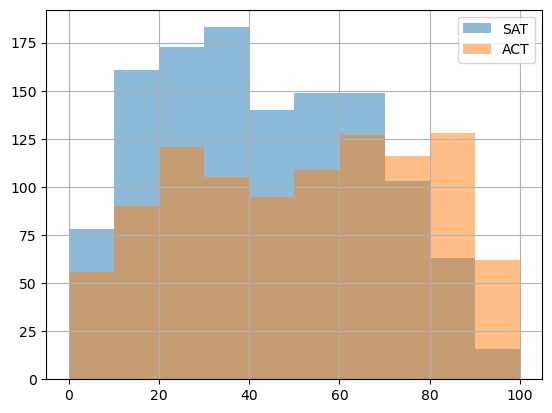

In [24]:
# Schools with passing SAT/ACT

ca['PctBothBenchmark12'].hist(alpha=0.5,label='SAT')
ca['PctGE21'].hist(alpha=0.5,label='ACT')
plt.legend()

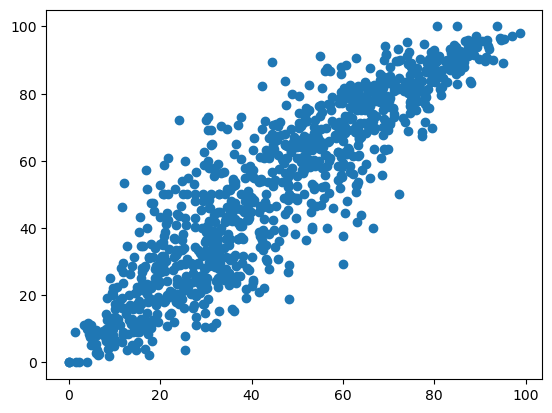

In [25]:
plt.scatter(x=ca['PctBothBenchmark12'],y=ca['PctGE21'])

In [26]:
ca.corr()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
SCode,1.000000,0.230382,0.142605,0.172268,0.219046,0.230382,0.076373,0.093444,0.219791
Enroll12sat,0.230382,1.000000,0.821561,0.753799,0.312687,1.000000,0.578780,0.502040,0.329240
NumTSTTakr12,0.142605,0.821561,1.000000,0.759298,0.164739,0.821561,0.487159,0.355991,0.244435
TotNumBothBenchmark12,0.172268,0.753799,0.759298,1.000000,0.643533,0.753799,0.566914,0.736133,0.643319
PctBothBenchmark12,0.219046,0.312687,0.164739,0.643533,1.000000,0.312687,0.358715,0.688107,0.898466
Enroll12act,0.230382,1.000000,0.821561,0.753799,0.312687,1.000000,0.578780,0.502040,0.329240
NumTstTakr,0.076373,0.578780,0.487159,0.566914,0.358715,0.578780,1.000000,0.759508,0.169490
NumGE21,0.093444,0.502040,0.355991,0.736133,0.688107,0.502040,0.759508,1.000000,0.619270
PctGE21,0.219791,0.329240,0.244435,0.643319,0.898466,0.329240,0.169490,0.619270,1.000000


# Schools that Focus on ACT

In [27]:
ca_act_schools = ca[ca['NumGE21'] > ca['NumTSTTakr12']]

In [28]:
ca_act_schools.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,4.400000e+01,44.000000,44.000000,36.000000,36.000000,44.000000,44.000000,44.000000,44.000000
mean,2.144392e+06,379.863636,113.931818,114.500000,79.310556,379.863636,179.681818,146.068182,73.312500
std,1.818546e+06,235.432960,80.112827,61.578521,14.729897,235.432960,93.923465,97.969477,27.432443
min,1.016830e+05,18.000000,1.000000,8.000000,27.590000,18.000000,15.000000,4.000000,12.120000
25%,1.310158e+05,149.000000,29.750000,74.500000,77.950000,149.000000,119.000000,55.500000,60.495000
50%,2.265980e+06,397.000000,119.500000,117.000000,81.610000,397.000000,168.500000,150.000000,87.675000
75%,3.730276e+06,586.500000,180.000000,159.000000,88.345000,586.500000,239.750000,206.250000,91.882500
max,5.337456e+06,808.000000,270.000000,244.000000,96.950000,808.000000,409.000000,392.000000,97.300000


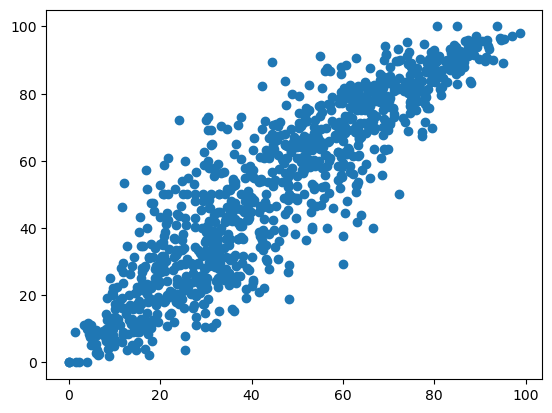

In [29]:
plt.scatter(x=ca['PctBothBenchmark12'],y=ca['PctGE21'])

# Schools that do better on ACT

In [30]:
ca_better_act = ca[ca['PctGE21'] > ca['PctBothBenchmark12']]

In [31]:
ca_better_act.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,7.130000e+02,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,2.334911e+06,399.077139,167.095372,81.882188,48.301136,399.077139,74.046283,50.095372,60.069958
std,1.677551e+06,200.650770,114.387202,65.358735,23.257448,200.650770,59.198076,54.368767,23.376033
min,1.000810e+05,36.000000,15.000000,1.000000,1.390000,36.000000,15.000000,2.000000,5.170000
25%,7.304570e+05,233.000000,86.000000,30.000000,30.000000,233.000000,31.000000,15.000000,42.220000
50%,1.995737e+06,403.000000,145.000000,66.000000,48.940000,403.000000,55.000000,28.000000,63.640000
75%,3.730074e+06,539.000000,216.000000,116.000000,67.340000,539.000000,99.000000,63.000000,80.000000
max,6.120158e+06,1135.000000,932.000000,377.000000,96.950000,1135.000000,409.000000,392.000000,100.000000


<AxesSubplot:>

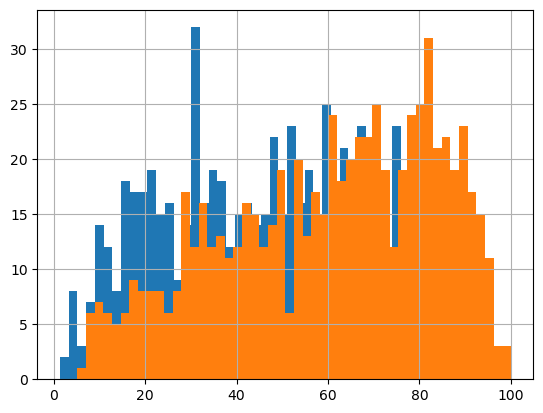

In [32]:
ca_better_act['PctBothBenchmark12'].hist(bins=50)
ca_better_act['PctGE21'].hist(bins=50)

In [33]:
ca_same_size = ca[(ca['NumTSTTakr12'] - ca['NumTstTakr'])/ca['NumTSTTakr12'] < 0.1]

In [34]:
ca_same_size.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,2.440000e+02,244.000000,244.000000,175.000000,175.000000,244.000000,244.000000,190.000000,190.000000
mean,1.846592e+06,219.745902,74.581967,55.314286,44.424229,219.745902,106.577869,65.236842,41.076526
std,1.896826e+06,203.284413,74.179500,60.150182,28.800887,203.284413,103.810557,79.166837,32.470164
min,1.000650e+05,3.000000,1.000000,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000
25%,1.225378e+05,66.500000,9.000000,10.000000,17.480000,66.500000,27.000000,11.000000,13.152500
50%,1.033908e+06,128.500000,57.000000,27.000000,35.250000,128.500000,88.500000,24.000000,27.305000
75%,3.631643e+06,381.250000,112.000000,83.000000,76.265000,381.250000,152.000000,107.500000,78.765000
max,6.116750e+06,808.000000,425.000000,244.000000,96.950000,808.000000,512.000000,392.000000,97.300000


# Large Schools

In [35]:
ca_large = ca[ca['Enroll12sat'] >= 471]

In [36]:
ca_large.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,3.540000e+02,354.000000,354.000000,353.000000,353.000000,354.000000,354.000000,349.000000,349.000000
mean,2.557811e+06,598.336158,241.742938,125.473088,52.807819,598.336158,116.209040,75.404011,60.512579
std,1.482134e+06,113.314861,110.667836,68.781852,21.744683,113.314861,81.517348,64.018946,22.704874
min,1.000810e+05,471.000000,9.000000,10.000000,9.500000,471.000000,1.000000,5.000000,8.470000
25%,1.930194e+06,518.250000,177.000000,71.000000,34.480000,518.250000,55.250000,27.000000,43.240000
50%,3.030706e+06,573.000000,217.000000,116.000000,53.690000,573.000000,94.000000,54.000000,63.640000
75%,3.634902e+06,648.000000,270.750000,178.000000,69.940000,648.000000,154.000000,107.000000,80.490000
max,5.735154e+06,1135.000000,932.000000,385.000000,96.950000,1135.000000,512.000000,392.000000,97.170000
